# 0.npzファイルの読み込みと展開

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import importlib

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
npz =  np.load('C:/my_comp_train_XY/my_comp_train_XY.npz')
X_train = npz['X']
y_train = npz['y']

# 1.データのダウンロード・分析

In [4]:
def show_image_by_label(X, y, target_label, show_num=6, figsize=(8,8), random=True):
    X_sub, y_sub= X[y==target_label], y[y==target_label]
    if random:
        rnd_idx = np.random.permutation(len(X_sub))[:show_num]
        X_sub, y_sub = X_sub[rnd_idx], y_sub[rnd_idx]
    X_sub, y_sub = X_sub[:show_num], y_sub[:show_num]
    
    rows, cols = np.ceil(show_num/2), 3
    plt.figure(figsize=figsize)
    print("Showing image with label:{}".format(target_label))
    for i, img in enumerate(X_sub):
        plt.subplot(rows, cols, i+1)
        plt.imshow(img, cmap="gray")
        plt.axis('off')
    plt.show()

Showing image with label:0


<ipython-input-4-6419b0dceb46>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows, cols, i+1)


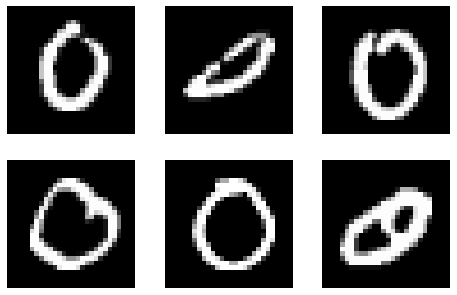

Showing image with label:1


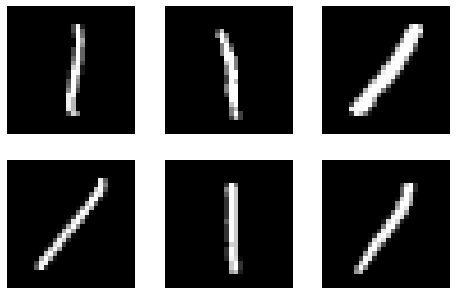

Showing image with label:2


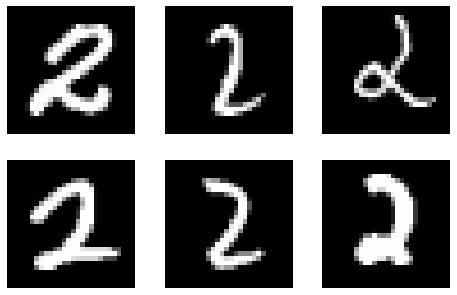

Showing image with label:3


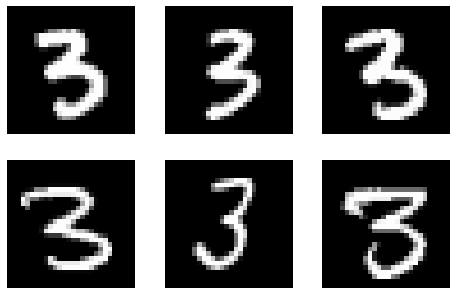

Showing image with label:4


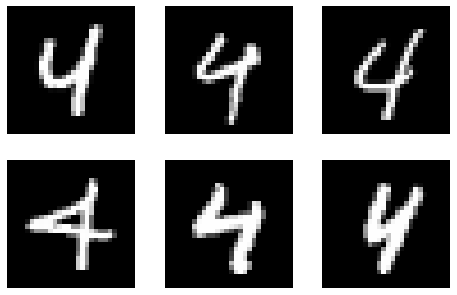

Showing image with label:5


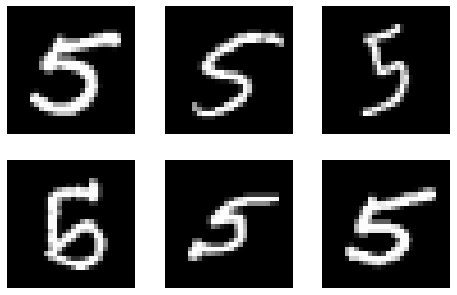

Showing image with label:6


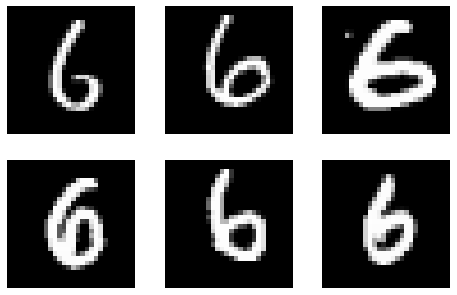

Showing image with label:7


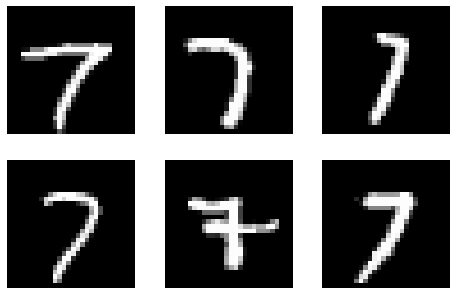

Showing image with label:8


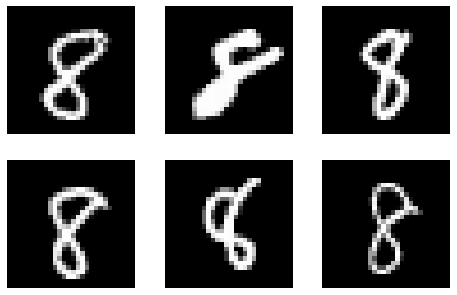

Showing image with label:9


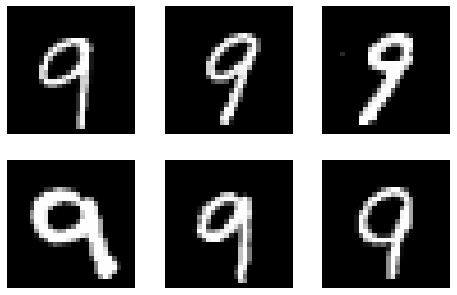

In [5]:
for label in np.unique(y_train):
    show_image_by_label(X_train, y_train, target_label=label)

# 2.データの前処理

# 2-1. 訓練データとテストデータへの分類

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
#npzファイルの読み込みと展開
npz = np.load('C:/my_comp_train_XY/my_comp_train_XY.npz')
X_train_raw = npz['X']
y_train_raw = npz['y']

# 2-2. 標準化・データのレンジ

In [8]:
#ravel()で展開したXのデータを0.0から1.0に標準化
X_train_scaled = X_train_raw/255.
y_train_scaled = y_train_raw.copy()

In [9]:
#訓練データとテストデータに分ける(引数stratify)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_scaled, y_train_scaled,
                                                      shuffle=True, test_size=0.3, stratify=y_train_scaled)

In [10]:
print("Train data shape, X_train.shape:{} y_train.shape:{}".format(X_train.shape, y_train.shape))
print("Valid data shape, X_valid.shape:{} y_valid.shape:{}".format(X_valid.shape, y_valid.shape))

Train data shape, X_train.shape:(31833, 28, 28) y_train.shape:(31833,)
Valid data shape, X_valid.shape:(13644, 28, 28) y_valid.shape:(13644,)


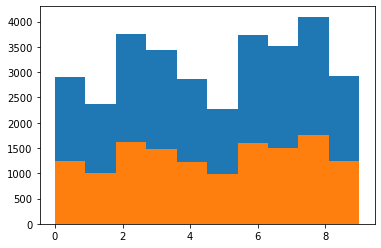

In [11]:
plt.hist(y_train)
plt.hist(y_valid)
plt.show()

# 3.訓練データでモデルを学習する

# 3-1. モデルの選択と精度の評価

In [13]:
#LinearSVCを用いる
#次元(総数, 行*列)と次元数
X_train_linearSVC, X_valid_linearSVC = X_train.reshape(-1, 28*28), X_valid.reshape(-1, 28*28)
linsvc_clf = LinearSVC()
cross_val_score(linsvc_clf, X_train_linearSVC, y_train, cv=4, scoring="accuracy")

C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\takay\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([0.90463626, 0.90261372, 0.90387032, 0.90110581])